In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%autosave 100

Autosaving every 100 seconds


In [3]:
"""
@file morph_lines_detection.py
@brief Use morphology transformations for extracting horizontal and vertical lines sample code
"""
import numpy as np
import sys
import cv2 as cv
def show_wait_destroy(winname, img):
    cv.imshow(winname, img)
    cv.moveWindow(winname, 500, 0)
    cv.waitKey(0)
    cv.destroyWindow(winname)
def preprocess(image):
    # Load the image
    src = image
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + argv[0])
        return -1
    # Show source image
    # [load_image]
    # [gray]
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    #show_wait_destroy("gray", gray)
    # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv.bitwise_not(gray)
    bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
    #plt.imshow()
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 15))
    # Apply morphology operations
    #horizontal = cv.erode(horizontal, horizontalStructure)
    horizontal = cv.dilate(horizontal, horizontalStructure)
    # Show extracted horizontal lines
    #show_wait_destroy("horizontal", horizontal)
    # [horiz]
    # [vert]
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    #vertical = cv.erode(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    #show_wait_destroy("vertical", vertical)
    # [smooth]
    
    # Step 1
    edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
    #show_wait_destroy("edges", edges)
    # Step 2
    kernel = np.ones((2, 2), np.uint8)
    edges = cv.dilate(edges, kernel)
    #show_wait_destroy("dilate", edges)
    # Step 3
    smooth = np.copy(vertical)
    # Step 4
    smooth = cv.blur(smooth, (2, 2))
    # Step 5
    (rows, cols) = np.where(edges != 0)
    vertical[rows, cols] = smooth[rows, cols]
    # Show final result
    return vertical
    # [smooth]

In [4]:
def preprocess_show(image):
    # Load the image
    src = image
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + argv[0])
        return -1
    # Show source image
    # [load_image]
    # [gray]
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    #show_wait_destroy("gray", gray)
    # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv.bitwise_not(gray)
    bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    print("Adaptive Threshold")
    plt.imshow(bw)
    plt.show()
    # Show binary image
    #plt.imshow()
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 15))
    # Apply morphology operations
    #horizontal = cv.erode(horizontal, horizontalStructure)
    horizontal = cv.dilate(horizontal, horizontalStructure)
    print("Horizontal structure element and dilate")
    plt.imshow(horizontal)
    plt.show()
    # Show extracted horizontal lines
    #show_wait_destroy("horizontal", horizontal)
    # [horiz]
    # [vert]
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    #vertical = cv.erode(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    #show_wait_destroy("vertical", vertical)
    # [smooth]
    print("Vertical structure element and double dilate")
    plt.imshow(vertical)
    # Step 1
    plt.show()
    edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
    #show_wait_destroy("edges", edges)
    # Step 2
    kernel = np.ones((2, 2), np.uint8)
    edges = cv.dilate(edges, kernel)
    #show_wait_destroy("dilate", edges)
    # Step 3
    smooth = np.copy(vertical)
    # Step 4
    smooth = cv.blur(smooth, (2, 2))
    # Step 5
    (rows, cols) = np.where(edges != 0)
    vertical[rows, cols] = smooth[rows, cols]
    # Show final result
    print("Smooth version")
    plt.imshow(vertical)
    plt.show()
    #return vertical
    # [smooth]

In [5]:
import cv2 as cv
import pandas as pd
import numpy as np
input_images  = "./train/train/"
test_images = "./test/real"

In [6]:
import os

In [7]:
train_csv = pd.read_csv("./train.csv")

In [8]:
image = cv.imread(input_images+train_csv['Id'][0])

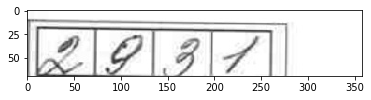

In [9]:
plt.imshow(image)

original fara denoising


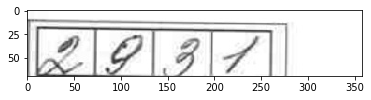

Adaptive Threshold


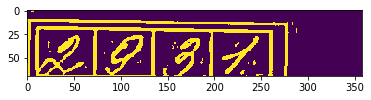

Horizontal structure element and dilate


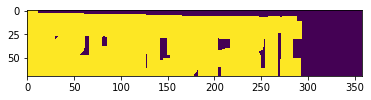

Vertical structure element and double dilate


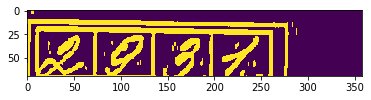

Smooth version


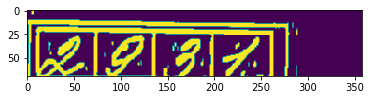

In [10]:
print("original fara denoising")
plt.imshow(image)
plt.show()

preprocess_show(image)

original cu denoising


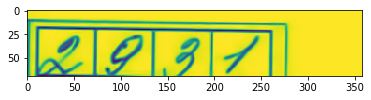

Adaptive Threshold


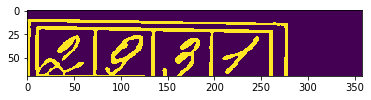

Horizontal structure element and dilate


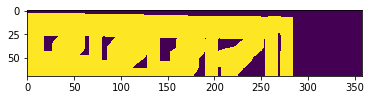

Vertical structure element and double dilate


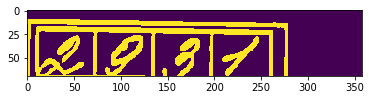

Smooth version


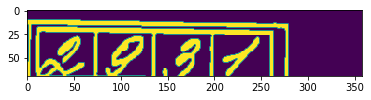

In [49]:
print("original cu denoising")

#preprocess_show(image)


im = Image.open(input_images+train_csv['Id'][0]).convert('L')
im = cv.fastNlMeansDenoising(np.array(im),None, 30, 7, 10)
plt.imshow(im)
plt.show()
output = preprocess_show(im)


In [11]:
from PIL import Image, ImageChops

def trim_white(im):
    im = Image.open(im).convert('L')
    im = cv.fastNlMeansDenoising(np.array(im),None, 30, 7, 10)
#     im = cv.medianBlur(np.asarray(im),5)
#     im = cv.adaptiveThreshold(im,100,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,5)
    return im
#     im = cv.fastNlMeansDenoising(im,None, 7, 7, 13)
#     im 
#     im = Image.fromarray(im)
#     bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
#     diff = ImageChops.difference(im, bg)
#     diff = ImageChops.add(diff, diff, 2.0, -100)
#     bbox = diff.getbbox()
#     if bbox:
#         return np.array(im.crop(bbox))
#     else:
#         return np.array(im)



In [12]:
pure_images = []
for x in train_csv['Id']:
    img = cv.imread(input_images+x,cv.IMREAD_GRAYSCALE)
    
    #print(type(img))
    pure_images.append(img)

In [13]:
pure_images_train = []
for x in sorted(os.listdir(test_images)):
    img = cv.imread(test_images+x,cv.IMREAD_GRAYSCALE)
    
    #print(type(img))
    pure_images_train.append(img)

In [14]:
training_image = []
for x in train_csv['Id']:
    
    img = trim_white(input_images+x)
    img = preprocess(img)
    #print(type(img))
    training_image.append(img)

In [15]:
test_image = []
for x in os.listdir(test_images):
    
    img = trim_white(test_images+"/"+x)
    img = preprocess(img)
    #img = cv.Canny(img,100,200)
    #print(type(img))
    test_image.append(img)

In [16]:
# for x in training_image:
#     print(x.shape)

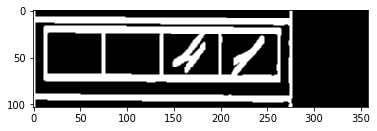

In [17]:
plt.imshow(training_image[2],cmap='gray')

### Pastram continutul imagini care ne intereseaza

In [18]:
for i in range(0,len(test_image)):
    if test_image[i].shape[0] > 90:
        test_image[i] = test_image[i][:90,:]
    if test_image[i].shape[1] > 270:
         test_image[i] = test_image[i][:,:280]

In [19]:
for i in range(0,len(training_image)):
    if training_image[i].shape[0] > 90:
        training_image[i] = training_image[i][:90,:]
    if training_image[i].shape[1] > 270:
         training_image[i] = training_image[i][:,:280]

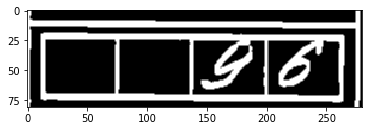

In [22]:
plt.imshow(training_image[1],cmap='gray')

##### Resize continutul imagini pentru a avea aceleasi marimi 

In [23]:
for i in range(0,len(training_image)):
    training_image[i] = cv.resize(training_image[i],(280,90))

In [24]:
for i in range(0,len(test_image)):
    test_image[i] = cv.resize(test_image[i],(280,90))

In [25]:
import matplotlib.pyplot as plt
#labels = []
test_data = []
for x in test_image:
        test_data.append(x[8:,10:75])
        test_data.append(x[8:,75:140])
        test_data.append(x[8:,135:205])
        test_data.append(x[8:,200:270])
#         if len(string_s) <4:
#             print(0)
#         else:
#             print(string_s[0])


## first patch x[20:,:90]
## second patch x[10:,70:140]
### third patch x[10:,130:200]
#### fourth patch x[10:,200:270]

In [26]:
import matplotlib.pyplot as plt
labels = []
train_data = []
for x,y in zip(training_image,train_csv['label']):
    string_s = str(y)
    if len(string_s) == 4:
        train_data.append(x[8:,10:75])
        train_data.append(x[8:,75:140])
        train_data.append(x[8:,135:205])
        train_data.append(x[8:,200:270])
        labels.append(int(string_s[0]))
        labels.append(int(string_s[1]))
        labels.append(int(string_s[2]))
        labels.append(int(string_s[3]))
    elif len(string_s) == 3:
        train_data.append(x[8:,10:75])
        train_data.append(x[8:,75:140])
        train_data.append(x[8:,135:205])
        train_data.append(x[8:,200:270])
        labels.append(0)
        labels.append(int(string_s[0]))
        labels.append(int(string_s[1]))
        labels.append(int(string_s[2]))
    elif len(string_s) == 2:
        train_data.append(x[8:,10:75])
        train_data.append(x[8:,75:140])
        train_data.append(x[8:,135:205])
        train_data.append(x[8:,200:270])
        labels.append(0)
        labels.append(0)
        labels.append(int(string_s[0]))
        labels.append(int(string_s[1]))
    elif len(string_s) == 1:
        train_data.append(x[8:,10:75])
        train_data.append(x[8:,75:140])
        train_data.append(x[8:,135:205])
        train_data.append(x[8:,200:270])
        labels.append(0)
        labels.append(0)
        labels.append(0)
        labels.append(int(string_s[0]))

Cream patchuri de imagini care contin casute de numere si facem labeling in functie de numarul nostru, casutele negre simple si linile, sunt labeluite ca fiind 0, astfel invatam modelul sa spuna cand e o casuta goala,cu linie si daca contine cifra 0

In [27]:
plus = 1
for i in range(1,len(train_data)):
    if plus < len(train_data):
        cv.imwrite("./data_set/"+str(i)+".jpg",train_data[plus])
        plus+=4
    else:
        break

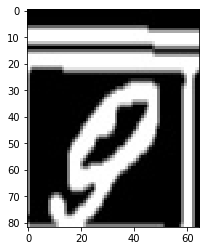

In [29]:
plt.imshow(cv.imread("./data_set/1.jpg"))

Aducem patchurile la acelasi size

In [33]:
for i in range(0,len(test_data)):
    test_data[i] = cv.resize(test_data[i],(100,100))

In [34]:
for i in range(0,len(train_data)):
    train_data[i] = cv.resize(train_data[i],(100,100))

In [35]:
len(train_data)

8000

In [36]:
len(labels)

8000

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision

In [38]:
from torch.backends import cudnn
n_epochs = 80
batch_size_train = 64
batch_size_test = 250
learning_rate = 0.001
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = True
torch.manual_seed(random_seed)

torch.cuda.manual_seed(random_seed)
cudnn.benchmark = True

In [39]:
labels[:15]

[2, 9, 3, 1, 0, 0, 9, 6, 0, 0, 4, 1, 0, 8, 7]

In [78]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 60, kernel_size=3)
        self.conv2 = nn.Conv2d(60, 128, kernel_size=3)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3)
        self.conv4 = nn.Conv2d(256, 300, kernel_size=3)
        self.conv5 = nn.Conv2d(300, 528, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.conv3_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(528, 1600)
        self.fc2 = nn.Linear(1600, 900)
        self.fc3 = nn.Linear(900, 450)
        self.fc4 = nn.Linear(450, 10)

    def forward(self, x):
        #print(x.shape)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv4(x)), 2))
        x = F.relu(F.max_pool2d(self.conv3_drop(self.conv5(x)), 2))
        #print(x.shape)
        x = x.view(-1,528)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        #print(x.shape)
        return F.log_softmax(x,dim=1)

In [79]:
#network = Net().cuda()
#network.load_state_dict(torch.load("./0629 loss.pth"))

In [80]:
from torch.utils.data import Dataset, DataLoader
class HandWriting(Dataset):
    def __init__(self, csv_file,labels, transform=None):
        
        self.images = np.array(csv_file)
        print(self.images.shape)
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        sample = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample,label

In [81]:
train_loader = torch.utils.data.DataLoader(HandWriting(train_data[:6000],labels[:6000],
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ],)),batch_size = batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(HandWriting(train_data[6000:],labels[6000:],
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

(6000, 100, 100)
(2000, 100, 100)


In [82]:
total_loader = torch.utils.data.DataLoader(HandWriting(train_data,labels,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),batch_size = batch_size_train, shuffle=True)

(8000, 100, 100)


In [83]:
output_loader = torch.utils.data.DataLoader(HandWriting(test_data,test_data,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),batch_size = batch_size_train)

(9996, 100, 100)


In [53]:
train_loader_mnist = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([torchvision.transforms.Resize((80,80)),
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader_mnist = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([torchvision.transforms.Resize((80,80)),
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [84]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [85]:
example_data.shape

torch.Size([250, 1, 100, 100])

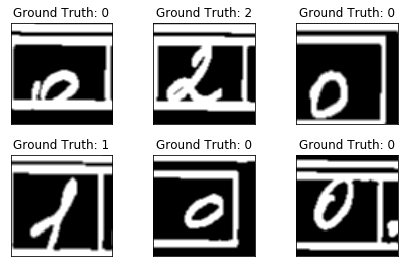

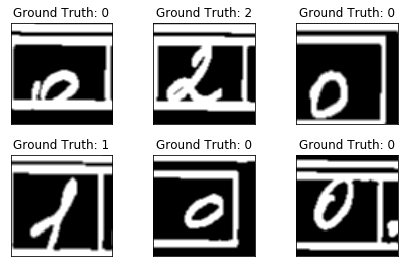

In [86]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [87]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [88]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    #print(data.shape)
    optimizer.zero_grad()
    output = network(data.cuda())
    #print(output.shape)
    #print(target)
    loss = F.nll_loss(output, target.long().cuda())
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './results/model.pth')
      torch.save(optimizer.state_dict(), './results/optimizer.pth')

In [89]:
def total(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(total_loader):
    
    optimizer.zero_grad()
    output = network(data.cuda())
    loss = F.nll_loss(output, target.long().cuda())
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(total_loader.dataset),
        100. * batch_idx / len(total_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(total_loader.dataset)))
      torch.save(network.state_dict(), './results/model.pth')
      torch.save(optimizer.state_dict(), './results/optimizer.pth')

In [90]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      ##print(data.shape)
      output = network(data.cuda())
      test_loss += F.nll_loss(output, target.long().cuda(), size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.cuda().data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [91]:
# test()
network = Net().cuda()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)
step = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[55,65], gamma=0.1)
for epoch in range(0, n_epochs):
    total(epoch)
    step.step()
    test()
    torch.save(network.state_dict(),"./models/"+str(epoch)+".pth")

Train Epoch: 0 [0/8000 (0%)]	Loss: 2.309709
Train Epoch: 0 [640/8000 (8%)]	Loss: 2.274329
Train Epoch: 0 [1280/8000 (16%)]	Loss: 2.142425
Train Epoch: 0 [1920/8000 (24%)]	Loss: 1.827223
Train Epoch: 0 [2560/8000 (32%)]	Loss: 1.905399
Train Epoch: 0 [3200/8000 (40%)]	Loss: 2.076851
Train Epoch: 0 [3840/8000 (48%)]	Loss: 1.855113
Train Epoch: 0 [4480/8000 (56%)]	Loss: 2.049754
Train Epoch: 0 [5120/8000 (64%)]	Loss: 1.786131
Train Epoch: 0 [5760/8000 (72%)]	Loss: 1.851299
Train Epoch: 0 [6400/8000 (80%)]	Loss: 1.686198
Train Epoch: 0 [7040/8000 (88%)]	Loss: 1.385238
Train Epoch: 0 [7680/8000 (96%)]	Loss: 1.826807


C:\Users\Dumi\Anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 1.3246, Accuracy: 1001/2000 (50%)

Train Epoch: 1 [0/8000 (0%)]	Loss: 1.499471
Train Epoch: 1 [640/8000 (8%)]	Loss: 1.308533


KeyboardInterrupt: 

In [111]:
# #Test set: Avg. loss: 0.0898, Accuracy: 1944/2000 (97%)

# #Test set: Avg. loss: 0.0971, Accuracy: 1948/2000 (97%)

# network.load_state_dict(torch.load("./models/44.pth"))
# #Test set: Avg. loss: 0.1377, Accuracy: 1931/2000 (97%)
# test()


Test set: Avg. loss: 0.0528, Accuracy: 1962/2000 (98%)



In [126]:
freq = {}
with torch.no_grad():
    for data, target in test_loader:
        ##print(data.shape)
        output = network(data.cuda())
        pred = output.data.max(1, keepdim=True)[1]
        #correct += pred.eq(target.cuda().data.view_as(pred)).sum()
        print(target[~pred.eq(target.cuda().data.view_as(pred)).data.view_as(target)])
        print(pred[~pred.eq(target.cuda().data.view_as(pred)).data.view_as(target)].view(-1))
        for x,y in zip(target[~pred.eq(target.cuda().data.view_as(pred)).data.view_as(target)],pred[~pred.eq(target.cuda().data.view_as(pred)).data.view_as(target)].view(-1)):
            x = int(x)
            if x in freq.keys():
                freq[x].append(int(y))
            else:
                freq[x]=[int(y)]

tensor([], dtype=torch.int64)
tensor([], device='cuda:0', dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], device='cuda:0', dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], device='cuda:0', dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], device='cuda:0', dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], device='cuda:0', dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], device='cuda:0', dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], device='cuda:0', dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], device='cuda:0', dtype=torch.int64)


In [127]:
freq

{}

In [512]:
import collections
collections.OrderedDict(sorted(freq.items()))

OrderedDict([(0, 14),
             (1, 6),
             (2, 10),
             (3, 6),
             (4, 4),
             (5, 4),
             (6, 4),
             (7, 7),
             (8, 12),
             (9, 6)])

In [133]:
#network.load_state_dict(torch.load("./0629 loss.pth"))

In [134]:
# network.eval()

In [135]:
# fig = plt.figure()
# plt.plot(train_counter, train_losses, color='blue')
# plt.scatter(test_counter, test_losses, color='red')
# plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
# plt.xlabel('number of training examples seen')
# plt.ylabel('negative log likelihood loss')
# fig

In [ ]:
submision_csv = pd.read_csv("sampleSubmission.csv")

In [137]:
total_test = []
for batch_idx, (data, target) in enumerate(output_loader):
    output = network(data.cuda())
    for x in torch.argmax(output,axis=1):
        total_test.append(x)
aaaa = []
for x in submision_csv.iterrows():
    out1 = str()
    #print(x[0])
    out1 +=str(int(total_test[x[0]*4].cpu()))
    out1 +=str(int(total_test[x[0]*4+1].cpu()))
    out1 +=str(int(total_test[x[0]*4+2].cpu()))
    out1 +=str(int(total_test[x[0]*4+3].cpu()))
    #print(out1)
    predicted = int(out1)
    #print()
    #print(x[1])
    #print(submision_csv.iloc[x[0]])
    submision_csv["Expected"][x[0]] = predicted
    #aaaa.append(predicted)

C:\Users\Dumi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [138]:
# for x,y in zip(submision_csv['Expected'].to_list(),test_image):
#     print(x)
#     plt.imshow(y)
#     plt.show()

In [139]:
submision_csv

,Id,Expected
0,22000.jpg,544
1,22001.jpg,308
2,22002.jpg,0
3,22003.jpg,1344
4,22004.jpg,118
...,...,...
2494,24494.jpg,5
2495,24495.jpg,162
2496,24496.jpg,329
2497,24497.jpg,162


In [468]:
submision_csv

,Id,Expected
0,22000.jpg,544
1,22001.jpg,308
2,22002.jpg,0
3,22003.jpg,1344
4,22004.jpg,118
...,...,...
2494,24494.jpg,5
2495,24495.jpg,162
2496,24496.jpg,329
2497,24497.jpg,162


In [85]:
for index,x in enumerate(submision_csv['Expected'].to_list()):
    if x != best[index]:
        print("Index ", index," diff ",x,best[index])

Index  69  diff  6 3
Index  72  diff  6 3
Index  86  diff  251 2519
Index  87  diff  162 160
Index  89  diff  304 2048
Index  91  diff  1820 1620
Index  96  diff  162 160
Index  97  diff  3 5
Index  98  diff  251 2519
Index  99  diff  854 8500
Index  100  diff  1280 1200
Index  103  diff  1820 1620
Index  104  diff  304 2048
Index  106  diff  3 5
Index  111  diff  854 8500
Index  114  diff  282 2823
Index  123  diff  0 1
Index  126  diff  282 2823
Index  127  diff  1415 1410
Index  128  diff  384 284
Index  129  diff  827 727
Index  144  diff  260 2609
Index  146  diff  0 60
Index  148  diff  30 830
Index  156  diff  201 2615
Index  158  diff  230 850
Index  187  diff  157 158
Index  188  diff  3 0
Index  189  diff  218 2180
Index  190  diff  82 12
Index  192  diff  717 17
Index  193  diff  22 12
Index  200  diff  888 881
Index  201  diff  220 2202
Index  203  diff  111 811
Index  213  diff  487 464
Index  216  diff  780 480
Index  217  diff  1100 1106
Index  225  diff  800 8000
Index 

In [715]:
print(submision_csv['Expected'].to_list())

[544, 308, 0, 1344, 118, 118, 42, 178, 1344, 1367, 91, 4, 17, 170, 178, 4, 665, 665, 4, 42, 0, 17, 648, 665, 648, 702, 1367, 702, 91, 170, 0, 1029, 1027, 1029, 117, 117, 21, 150, 21, 2, 150, 4, 2, 21, 237, 602, 34, 602, 4, 425, 0, 568, 34, 602, 568, 1027, 425, 237, 0, 201, 14, 5, 47, 134, 28, 14, 0, 166, 172, 3, 28, 172, 3, 306, 172, 47, 0, 5, 6, 6, 68, 166, 306, 134, 68, 0, 2519, 160, 11, 2048, 1809, 1620, 580, 1380, 55, 3, 160, 5, 2519, 8500, 1200, 3, 354, 1620, 2048, 0, 5, 580, 11, 55, 1809, 8500, 1380, 354, 2823, 271, 57, 581, 109, 7, 12, 1408, 1408, 1, 29, 1379, 2823, 1410, 284, 727, 58, 21, 99, 39, 1, 16, 525, 525, 0, 5, 520, 827, 302, 282, 2609, 93, 60, 472, 830, 3, 12, 1122, 1114, 8, 44, 1070, 2615, 1493, 850, 1071, 151, 25, 121, 66, 0, 5, 621, 621, 0, 10, 611, 1080, 459, 232, 268, 7, 6, 31, 15, 0, 9, 112, 112, 0, 5, 107, 269, 158, 0, 2180, 12, 27, 17, 12, 3, 20, 902, 902, 0, 14, 881, 2202, 1300, 811, 0, 62, 37, 0, 272, 37, 1121, 6, 487, 464, 0, 0, 480, 1106, 0, 1130, 73, 14, 2

In [62]:
best = [544, 308, 0, 1344, 118, 118, 42, 178, 1344, 1367, 91, 4, 17, 170, 178, 4, 665, 665, 4, 42, 0, 17, 648, 665, 648, 702, 1367, 702, 91, 170, 0, 1029, 1027, 1029, 117, 117, 21, 150, 21, 2, 150, 4, 2, 21, 237, 602, 34, 602, 4, 425, 0, 568, 34, 602, 568, 1027, 425, 237, 0, 201, 14, 5, 47, 134, 28, 14, 0, 166, 172, 3, 28, 172, 3, 306, 172, 47, 0, 5, 6, 6, 68, 166, 306, 134, 68, 0, 2519, 160, 11, 2048, 1809, 1620, 580, 1380, 55, 3, 160, 5, 2519, 8500, 1200, 3, 354, 1620, 2048, 0, 5, 580, 11, 55, 1809, 8500, 1380, 354, 2823, 271, 57, 581, 109, 7, 12, 1408, 1408, 1, 29, 1379, 2823, 1410, 284, 727, 58, 21, 99, 39, 1, 16, 525, 525, 0, 5, 520, 827, 302, 282, 2609, 93, 60, 472, 830, 3, 12, 1122, 1114, 8, 44, 1070, 2615, 1493, 850, 1071, 151, 25, 121, 66, 0, 5, 621, 621, 0, 10, 611, 1080, 459, 232, 268, 7, 6, 31, 15, 0, 9, 112, 112, 0, 5, 107, 269, 158, 0, 2180, 12, 27, 17, 12, 3, 20, 902, 902, 0, 14, 881, 2202, 1300, 811, 0, 62, 37, 0, 272, 37, 1121, 6, 487, 464, 0, 0, 480, 1106, 0, 1130, 73, 14, 276, 38, 0, 8000, 5200, 5200, 0, 7, 513, 1139, 6190, 80, 1577, 107, 25, 240, 132, 0, 11, 710, 720, 0, 15, 705, 1589, 869, 167, 6220, 5100, 1400, 1990, 1300, 0, 1600, 2920, 2920, 0, 1300, 2790, 6430, 3510, 7900, 615, 33, 6, 68, 80, 1, 2, 370, 370, 0, 10, 360, 623, 253, 161, 544, 4, 16, 33, 26, 0, 5, 353, 353, 0, 7, 346, 546, 193, 58, 2069, 146, 22, 479, 62, 4, 4, 982, 982, 0, 20, 962, 2085, 1103, 209, 799, 81, 16, 68, 65, 1, 7, 493, 493, 0, 12, 481, 811, 318, 231, 640, 37, 9, 87, 39, 2, 5, 354, 353, 1, 8, 345, 547, 193, 189, 1327, 101, 28, 7, 30, 0, 8, 843, 843, 0, 30, 813, 1352, 509, 132, 2261, 8, 30, 0, 0, 0, 30, 1188, 1173, 15, 20, 1153, 2276, 1081, 0, 1605, 21, 9, 513, 64, 0, 39, 813, 873, 0, 9, 864, 1605, 732, 132, 438, 0, 2, 47, 13, 0, 1, 240, 240, 0, 7, 233, 440, 200, 20, 1133, 101, 28, 87, 41, 4, 3, 706, 706, 0, 81, 625, 1140, 434, 329, 1053, 146, 10, 94, 57, 0, 5, 580, 580, 0, 15, 565, 1053, 473, 245, 2997, 14, 4, 1, 30, 1, 0, 148, 149, 0, 1, 147, 290, 148, 42, 850, 45, 21, 61, 126, 0, 3, 479, 479, 0, 19, 460, 876, 397, 196, 1490, 106, 835, 313, 83, 8114, 104, 1028, 1028, 8000, 15, 1080, 2160, 1071, 230, 133, 2, 3, 38, 13, 0, 1, 85, 85, 0, 1, 4, 120, 39, 26, 834, 23, 27, 100, 24, 1, 1, 446, 446, 0, 12, 434, 834, 388, 140, 300, 2, 6, 62, 128, 0, 0, 261, 261, 0, 5, 256, 399, 138, 56, 99, 1006, 13, 68, 19, 9, 2, 586, 586, 0, 11, 575, 36, 550, 422, 1501, 14, 24, 408, 96, 0, 2, 820, 820, 0, 19, 801, 1493, 673, 232, 2059, 124, 16, 94, 29, 2, 8, 702, 701, 0, 11, 690, 2259, 1558, 412, 961, 25, 33, 160, 125, 1, 6, 567, 67, 0, 14, 553, 973, 400, 193, 360, 7, 27, 250, 27, 0, 5, 555, 555, 0, 19, 536, 863, 308, 220, 526, 122, 53, 162, 46, 1, 3, 979, 979, 0, 25, 954, 2538, 1559, 549, 763, 3, 9, 42, 71, 3, 5, 481, 431, 0, 15, 416, 764, 333, 127, 3055, 150, 49, 662, 122, 2, 9, 1341, 1341, 0, 44, 1297, 3000, 1659, 257, 953, 44, 27, 157, 66, 2, 4, 572, 572, 0, 14, 558, 976, 404, 251, 209, 1, 3, 113, 12, 0, 11, 52, 152, 0, 5, 147, 211, 59, 18, 1479, 75, 30, 746, 93, 3, 7, 872, 872, 0, 20, 852, 1488, 616, 378, 1062, 49, 15, 69, 98, 3, 6, 493, 485, 8, 15, 470, 1083, 590, 236, 1210, 110, 25, 111, 27, 880, 7, 660, 660, 0, 6, 650, 1222, 562, 364, 610, 64, 15, 57, 35, 3, 9, 368, 368, 0, 10, 358, 602, 234, 172, 11, 46, 22, 132, 13, 2, 0, 618, 619, 0, 4008, 610, 983, 365, 241, 1073, 85, 43, 380, 41, 8, 13, 882, 710, 0, 19, 763, 1580, 808, 0, 1030, 4, 19, 442, 42, 1, 5, 629, 629, 0, 12, 617, 1037, 408, 85, 1537, 7, 38, 320, 16, 0, 3, 747, 747, 0, 14, 733, 1555, 808, 65, 2, 1810, 3600, 4370, 7100, 3000, 1800, 9710, 9710, 0, 8000, 9510, 2372, 1401, 350, 1081, 47, 19, 165, 58, 2, 12, 578, 578, 0, 13, 565, 1181, 603, 248, 1551, 54, 51, 120, 69, 4, 0, 720, 180, 0, 10, 770, 1511, 732, 34, 2309, 171, 63, 179, 113, 1, 1, 1087, 1087, 0, 31, 1056, 2331, 1244, 497, 1092, 62, 12, 34, 4, 3, 9, 638, 638, 0, 10, 628, 1108, 470, 493, 983, 68, 13, 82, 18, 0, 9, 24, 523, 1, 12, 517, 995, 471, 311, 3163, 140, 45, 824, 115, 1, 73, 1494, 1494, 0, 33, 1461, 3283, 1789, 210, 410, 232, 2004, 49, 502, 1, 69, 6278, 378, 806, 4, 6274, 485, 318, 165, 300, 0, 2, 102, 6, 0, 0, 147, 147, 0, 7, 140, 307, 160, 25, 1742, 97, 26, 376, 32, 4, 3, 734, 739, 0, 8, 731, 1742, 1003, 168, 2244, 180, 49, 321, 101, 4, 2, 1136, 1136, 0, 19, 1117, 2297, 1161, 409, 436, 0, 8, 78, 0, 0, 5, 237, 237, 0, 7, 230, 435, 198, 6, 104, 13, 11, 68, 11, 0, 0, 237, 237, 3000, 10, 227, 483, 246, 59, 311, 15, 8, 50, 14, 1, 1, 136, 136, 0, 2, 134, 307, 171, 43, 225, 1015, 5, 1026, 4, 1, 3, 188, 188, 0, 6008, 180, 6332, 144, 111, 1512, 104, 60, 327, 81, 8, 4, 103, 1193, 0, 31, 1162, 2520, 1328, 150, 1446, 38, 38, 823, 31, 1, 13, 696, 696, 0, 26, 670, 1446, 752, 337, 613, 10, 2, 120, 16, 2, 2, 291, 291, 0, 8, 283, 607, 316, 108, 139, 6, 0, 15, 4, 0, 4, 88, 88, 0, 0, 88, 142, 54, 38, 951, 33, 24, 161, 155, 0, 503, 520, 620, 0, 9, 511, 947, 427, 115, 9040, 2800, 1700, 1575, 7850, 50, 1100, 4100, 4200, 0, 9000, 4203, 4255, 4860, 1160, 1138, 6111, 36, 430, 43, 3, 7, 703, 903, 0, 15, 358, 2140, 1237, 157, 5080, 4000, 1000, 915, 1300, 0, 1205, 2700, 2700, 500, 9000, 2610, 5350, 2650, 3400, 170, 3000, 2100, 1690, 9600, 4000, 1600, 5490, 5490, 0, 9000, 5400, 770, 3260, 2010, 938, 24, 19, 242, 38, 0, 4, 485, 485, 30, 18, 467, 980, 495, 110, 386, 9, 10, 68, 34, 3, 1, 192, 192, 0, 3, 189, 386, 194, 59, 1769, 111, 30, 501, 48, 3, 2, 833, 833, 0, 23, 6708, 1772, 935, 430, 662, 24, 5, 102, 1, 1, 1, 319, 319, 0, 15, 304, 669, 350, 148, 1144, 23, 47, 332, 41, 6001, 3, 593, 593, 0, 16, 577, 1228, 635, 97, 1033, 121, 48, 200, 28, 8, 4, 749, 744, 0, 19, 730, 1593, 780, 199, 1200, 139, 43, 374, 29, 6, 0, 0, 400, 0, 0, 423, 100, 490, 305, 2624, 136, 48, 393, 138, 7, 4, 1007, 1047, 0, 33, 1001, 2630, 1533, 299, 23, 73, 0, 700, 0, 3, 0, 2003, 1303, 80, 23, 1300, 3004, 1832, 0, 2354, 1000, 1004, 4, 41, 504, 31, 7, 2804, 0, 32, 112, 354, 1850, 11, 2415, 228, 61, 45, 34, 4, 6, 1154, 1154, 0, 81, 1127, 2413, 1259, 380, 2952, 195, 73, 385, 55, 21, 9, 1198, 1198, 0, 26, 1172, 2953, 1755, 323, 1253, 166, 59, 119, 5, 3, 7, 630, 30, 0, 17, 613, 1258, 628, 117, 1776, 142, 61, 218, 35, 7, 5, 718, 718, 6200, 32, 686, 8781, 1063, 155, 743, 3, 18, 259, 44, 3, 1, 397, 397, 0, 7, 390, 743, 346, 32, 1305, 70, 19, 288, 47, 0, 2, 764, 764, 0, 31, 733, 1313, 549, 290, 450, 18, 5, 48, 23, 2, 5, 285, 285, 0, 2, 283, 438, 153, 180, 617, 41, 22, 230, 31, 1, 2, 355, 355, 800, 8, 347, 630, 275, 195, 308, 15, 5, 34, 11, 0, 2, 161, 161, 0, 3, 152, 300, 138, 2, 1115, 49, 32, 46, 68, 2, 6, 820, 420, 0, 13, 403, 1927, 1102, 0, 2104, 119, 34, 241, 20, 0, 608, 1074, 1074, 0, 22, 1052, 2104, 1020, 506, 78, 3, 3, 8, 2, 3, 11, 52, 52, 0, 3, 49, 78, 26, 33, 400, 6, 0, 108, 3, 0, 10, 245, 245, 0, 8, 237, 400, 155, 43, 889, 97, 21, 97, 41, 0, 506, 456, 496, 0, 7, 479, 531, 435, 215, 1177, 65, 19, 189, 0, 0, 1, 599, 593, 0, 8, 585, 1177, 584, 211, 76, 0, 1, 24, 5, 0, 0, 47, 47, 0, 1, 46, 76, 29, 10, 165, 3, 3, 55, 17, 1, 15, 611, 111, 6000, 1, 110, 160, 50, 22, 159, 0, 3, 39, 15, 0, 3, 42, 92, 0, 0, 92, 153, 61, 32, 2907, 107, 48, 710, 239, 3, 19, 1986, 1386, 0, 27, 1359, 3004, 1618, 179, 184, 222, 0, 1, 1, 10, 12, 109, 169, 0, 3, 106, 185, 2080, 218, 281, 4, 7, 57, 21, 0, 6, 176, 176, 0, 3, 173, 312, 136, 66, 1294, 169, 68, 179, 23, 5, 104, 691, 691, 0, 13, 678, 1261, 570, 166, 2291, 200, 34, 73, 0, 0, 10, 929, 927, 0, 22, 707, 2297, 1366, 6, 1073, 0, 22, 423, 31, 1, 6, 548, 548, 0, 7, 541, 1106, 558, 28, 363, 0, 8, 165, 12, 0, 10, 209, 209, 0, 5, 204, 353, 144, 11, 199, 0, 5, 89, 7, 0, 4, 113, 113, 0, 6, 107, 392, 909, 7, 2771, 167, 28, 533, 144, 3, 20, 1160, 1158, 2, 25, 1133, 2771, 1611, 167, 2355, 77, 37, 206, 22, 1, 4, 949, 949, 0, 15, 934, 2362, 1473, 73, 1000, 82, 23, 262, 103, 4, 61, 641, 691, 0, 13, 628, 1209, 568, 114, 1417, 64, 10, 76, 37, 5, 6, 787, 787, 0, 23, 764, 1425, 638, 553, 1140, 76, 31, 131, 22, 0, 13, 593, 593, 0, 12, 581, 1155, 562, 290, 366, 22, 13, 29, 30, 0, 1, 209, 209, 0, 3, 206, 366, 157, 100, 205, 2, 6, 60, 15, 5000, 2, 111, 111, 0, 1, 110, 725, 114, 17, 2008, 105, 94, 440, 92, 3, 4, 984, 984, 0, 24, 960, 2036, 1052, 220, 246, 10, 7, 52, 33, 0, 5, 152, 152, 0, 5, 147, 203, 51, 41, 260, 18, 8, 20, 42, 0, 7, 144, 144, 0, 5, 139, 213, 69, 31, 643, 6, 16, 214, 28, 0, 5, 345, 345, 0, 6, 339, 647, 302, 62, 1405, 66, 24, 183, 59, 9, 0, 628, 628, 0, 21, 607, 1398, 770, 187, 1684, 85, 30, 164, 108, 5, 15, 680, 680, 0, 16, 664, 1708, 1028, 236, 1440, 73, 30, 157, 82, 2, 8, 679, 679, 50, 16, 663, 1448, 769, 281, 551, 8, 0, 69, 48, 0, 34, 287, 287, 0, 17, 270, 552, 265, 121, 5840, 2200, 1700, 8300, 4500, 0, 7008, 2918, 2910, 88, 1308, 2780, 5820, 2918, 8700, 1711, 78, 27, 339, 87, 5, 10, 735, 735, 0, 19, 716, 1711, 976, 98, 443, 57, 8, 40, 13, 1, 7, 254, 254, 0, 8, 254, 452, 198, 116, 878, 22, 882, 840, 18, 8800, 1, 162, 162, 0, 4, 158, 238, 70, 873, 0, 37, 803, 817, 15, 8800, 6, 169, 169, 0, 4, 5165, 254, 85, 87, 1369, 68, 14, 70, 88, 0, 4, 688, 688, 0, 21, 664, 1272, 584, 459, 961, 76, 15, 92, 88, 1, 3, 428, 428, 0, 80, 18, 962, 554, 125, 265, 25, 4, 14, 51, 0, 9, 152, 152, 0, 5, 147, 270, 118, 42, 374, 50, 10, 31, 15, 0, 5, 194, 194, 3, 10, 184, 377, 183, 64, 2074, 3, 50, 5500, 50, 0, 4, 1117, 3133, 0, 20, 1132, 2674, 1497, 0, 0, 0, 8007, 7, 5507, 1, 8000, 0, 0, 0, 0, 800, 0, 5, 0, 2502, 245, 47, 309, 53, 15, 18, 1071, 1071, 0, 23, 1049, 2511, 1440, 192, 2186, 153, 24, 22, 87, 0, 19, 924, 980, 0, 81, 903, 2186, 1262, 120, 2022, 219, 50, 255, 36, 2, 6, 927, 927, 0, 37, 890, 2038, 1111, 185, 2163, 157, 39, 172, 140, 7, 4, 997, 997, 0, 38, 959, 2180, 1183, 375, 196, 7, 1, 18, 11, 1, 10, 77, 77, 0, 0, 97, 126, 49, 30, 910, 2, 24, 348, 62, 3, 42, 536, 536, 80, 10, 526, 913, 377, 57, 1126, 4, 30, 335, 67, 2, 25, 557, 557, 0, 4, 553, 1126, 569, 82, 54, 0, 3, 9, 9, 0, 3, 26, 26, 0, 1, 25, 54, 28, 4, 221, 0, 6, 47, 21, 0, 4, 98, 98, 0, 2, 6, 221, 123, 15, 1576, 23, 19, 147, 126, 3, 3, 790, 790, 0, 9, 781, 1566, 776, 314, 637, 3, 9, 79, 34, 2, 6, 338, 338, 0, 11, 322, 645, 307, 53, 7378, 159, 44, 238, 105, 6, 4, 1047, 1047, 0, 22, 1025, 2382, 1333, 381, 1571, 92, 24, 291, 77, 5, 93, 703, 703, 0, 12, 691, 1577, 868, 109, 810, 15, 0, 110, 112, 1, 0, 380, 380, 0, 11, 369, 803, 423, 830, 462, 24, 10, 60, 29, 0, 1, 828, 228, 0, 8, 220, 462, 231, 93, 2993, 227, 47, 265, 161, 4, 11, 1392, 1392, 0, 25, 1364, 2996, 1604, 543, 1169, 5, 6, 256, 55, 1, 0, 452, 452, 0, 10, 442, 1177, 725, 55, 0, 60, 770, 0, 4740, 0, 813, 4, 310, 380, 0, 0, 0, 0, 0, 49, 1, 2, 5, 2, 1, 12, 35, 35, 0, 3, 32, 49, 14, 8, 1241, 121, 16, 113, 108, 2, 5, 614, 614, 0, 15, 599, 1252, 638, 169, 1291, 72, 28, 171, 62, 2, 5, 644, 544, 0, 24, 619, 1298, 654, 234, 880, 3, 9, 287, 42, 0, 8, 445, 445, 0, 10, 435, 938, 403, 67, 124, 0, 2, 54, 10, 0, 16, 84, 84, 0, 2, 82, 125, 41, 8, 1467, 96, 21, 288, 60, 5, 9, 698, 698, 0, 13, 683, 1431, 733, 127, 1772, 66, 54, 218, 47, 1, 6, 821, 821, 0, 52, 789, 1862, 1041, 350, 885, 87, 19, 142, 44, 83, 5, 459, 459, 80, 82, 457, 895, 8428, 810, 1063, 1, 9, 381, 31, 0, 5, 528, 528, 0, 14, 514, 1067, 539, 38, 303, 0, 3, 103, 18, 0, 4, 167, 167, 0, 5, 162, 329, 162, 18]

In [140]:
submision_csv.to_csv("test.csv",index=False)

In [714]:
#torch.save(network.state_dict(), "./best_model.pth")

In [94]:
submision_csv = pd.read_csv("test.csv")

In [63]:
for index,x in enumerate(submision_csv['Expected'].to_list()):
    if x != best[index]:
        print("Index ", index," diff ",x,best[index])

Index  4  diff  418 118
Index  31  diff  1079 1029
Index  59  diff  106 201
Index  69  diff  8 3
Index  72  diff  0 3
Index  87  diff  162 160
Index  89  diff  48 2048
Index  91  diff  1220 1620
Index  92  diff  510 580
Index  94  diff  65 55
Index  96  diff  162 160
Index  99  diff  500 8500
Index  100  diff  1280 1200
Index  103  diff  1880 1620
Index  104  diff  48 2048
Index  107  diff  500 580
Index  111  diff  8570 8500
Index  116  diff  51 57
Index  123  diff  0 1
Index  127  diff  1415 1410
Index  129  diff  827 727
Index  146  diff  61 60
Index  148  diff  30 830
Index  158  diff  230 850
Index  167  diff  7621 621
Index  177  diff  1 31
Index  178  diff  45 15
Index  185  diff  104 107
Index  186  diff  169 269
Index  188  diff  47 0
Index  192  diff  717 17
Index  193  diff  32 12
Index  200  diff  888 881
Index  203  diff  17 811
Index  206  diff  88 37
Index  207  diff  800 0
Index  212  diff  1487 487
Index  213  diff  487 464
Index  217  diff  1140 1106
Index  220  diff 

In [141]:
torch.save(network.state_dict(),"./last_model.pth")